### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [6]:
# Data Loading
import pandas as pd
wine_data_path = "A:\\py-code\\1-ML\\Feature-Engineering\\4-FeatureExtraction\\winequalityN - winequalityN.csv"
wine = pd.read_csv(wine_data_path)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Checking for duplicated data
wine.duplicated().sum()

1168

In [8]:
# We need to remove duplicated rows and missing value rows

# Load the Wine Quality dataset
print("Wine Data Shape :", wine.shape)

# Drop rows with missing values
wine = wine.dropna()

# Dropping Duplicates rows
wine.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine.shape)

Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = wine.drop('type', axis=1)
Y = wine['type']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Encode the categorical data: Both Train and test

# X_train[X_train['type'] == "white"] = 0
# X_train[X_train['type'] == "red"]   = 1

# X_test[X_test['type'] == "white"] = 0
# X_test[X_test['type'] == "red"]   = 1

In [11]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1447,7.4,0.16,0.49,1.2,0.055,18.0,150.0,0.99170,3.23,0.47,11.200000,6
3322,5.7,0.26,0.30,1.8,0.039,30.0,105.0,0.98995,3.48,0.52,12.500000,7
3753,6.6,0.27,0.33,1.4,0.042,24.0,183.0,0.99215,3.29,0.46,10.700000,5
1385,6.2,0.33,0.29,1.3,0.042,26.0,138.0,0.99560,3.77,0.64,9.500000,5
3153,5.8,0.29,0.33,3.7,0.029,30.0,88.0,0.98994,3.25,0.42,12.300000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,4.8,0.26,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.500000,7
4699,6.8,0.30,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.800000,5
6373,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
6414,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.600000,5


In [12]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
516,6.8,0.18,0.37,1.60,0.055,47.0,154.0,0.99340,3.08,0.45,9.100000,5
1320,7.6,0.19,0.42,1.50,0.044,6.0,114.0,0.99140,3.04,0.74,12.800000,6
983,5.7,0.36,0.34,4.20,0.026,21.0,77.0,0.99070,3.41,0.45,11.900000,6
4380,5.7,0.31,0.29,7.30,0.050,33.0,143.0,0.99332,3.31,0.50,11.066667,6
6362,6.8,0.59,0.10,1.70,0.063,34.0,53.0,0.99580,3.41,0.67,9.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
878,6.2,0.16,0.54,1.40,0.126,37.0,110.0,0.99320,3.23,0.37,8.900000,6
3765,6.9,0.40,0.17,12.90,0.033,59.0,186.0,0.99754,3.08,0.49,9.400000,5
2779,6.7,0.20,0.37,1.65,0.025,42.0,103.0,0.99022,3.11,0.45,11.400000,5
2086,8.2,0.17,0.32,1.50,0.050,17.0,101.0,0.99400,3.14,0.58,9.500000,5


In [13]:
Y_train

1447    white
3322    white
3753    white
1385    white
3153    white
        ...  
3830    white
4699    white
6373      red
6414      red
1038    white
Name: type, Length: 4236, dtype: object

# Train without PCA

In [14]:
# Step1: Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step2: Create object
knn = KNeighborsClassifier(n_neighbors=5)

# Step3: Fit the model
knn.fit(X_train_scaled,Y_train)

# Step4: Predict the results and evaluate the accuracy score
Y_pred = knn.predict(X_test_scaled)
accuracy_score(Y_pred,Y_test)

# Evaluate the classification accuracy without PCA
accuracy_no_pca = accuracy_score(Y_test, Y_pred)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))

KNN having features - 12
Classification Accuracy without PCA: 99.34%


# Train using PCA

## Step1: Mean Centering/Standardization

In [15]:
# Step1: Import libraries
from sklearn.preprocessing import StandardScaler

# Step2: Create an object
scalar = StandardScaler()

# Step3: Fit and transform the data (X_train, X_test)
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Step 2 + 3: Covariance and Eigendecomposition

In [16]:
# Step1: Import libraries
from sklearn.decomposition import PCA

# Step2: Create Object
pca = PCA(n_components=5)

# Step3: Fit and transform the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
X_train.shape, " VS ", X_train_pca.shape, " -- ",X_test.shape, " VS ", X_test_pca.shape

((4236, 12), ' VS ', (4236, 5), ' -- ', (1059, 12), ' VS ', (1059, 5))

## Train the model on the Reduced Data using PCA

In [18]:
# Step1: Import libararies
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step2: Create an object
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Step3: Fit  the (X_train_pca, Y_train)
knn_pca.fit(X_train_pca,Y_train)

# # Step4: Predict and evaluate the results
Y_pred_pca = knn.predict(X_test_pca)

# # Evaluate the classification accuracy with PCA
# accuracy_pca = accuracy_score(Y_test, Y_pred_pca)

# print("KNN having features -", X_train_pca.shape[1])
# print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

ValueError: X has 5 features, but KNeighborsClassifier is expecting 12 features as input.

## I Think I was getting the above  error just becuase I wrote the code in multiple cells 🤷‍♂️

In [ ]:
# Step 1: Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Step 2: Create PCA and transform data
pca = PCA(n_components=5)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)  # Fit PCA on training data
X_test_pca = pca.transform(X_test)        # Transform test data

# Step 3: Create KNN classifier object
knn_pca = KNeighborsClassifier(n_neighbors=5)

# Step 4: Fit the model
knn_pca.fit(X_train_pca, Y_train)

# Step 5: Predict and evaluate the results
Y_pred_pca = knn_pca.predict(X_test_pca)  # Use knn_pca for prediction

# Step 6: Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(Y_test, Y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))


KNN having features - 5
Classification Accuracy with PCA: 93.11%


In [22]:
results = []
for i in range(1,13):
    # Apply PCA on the standardized features
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train a K-Nearest Neighbors (KNN) classifier with PCA
    knn_with_pca = KNeighborsClassifier(n_neighbors=5)
    knn_with_pca.fit(X_train_pca, Y_train)

    # Predict the wine type on the testing set with PCA
    y_pred_pca = knn_with_pca.predict(X_test_pca)

    # Evaluate the classification accuracy with PCA
    accuracy_pca = accuracy_score(Y_test, y_pred_pca)

    print("KNN having features -", X_train_pca.shape[1],"Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))
    results.append(accuracy_pca)

KNN having features - 1 Classification Accuracy with PCA: 97.54%
KNN having features - 2 Classification Accuracy with PCA: 97.64%
KNN having features - 3 Classification Accuracy with PCA: 97.54%
KNN having features - 4 Classification Accuracy with PCA: 98.58%
KNN having features - 5 Classification Accuracy with PCA: 98.87%
KNN having features - 6 Classification Accuracy with PCA: 98.87%
KNN having features - 7 Classification Accuracy with PCA: 99.06%
KNN having features - 8 Classification Accuracy with PCA: 99.34%
KNN having features - 9 Classification Accuracy with PCA: 99.24%
KNN having features - 10 Classification Accuracy with PCA: 99.24%
KNN having features - 11 Classification Accuracy with PCA: 99.24%
KNN having features - 12 Classification Accuracy with PCA: 99.34%


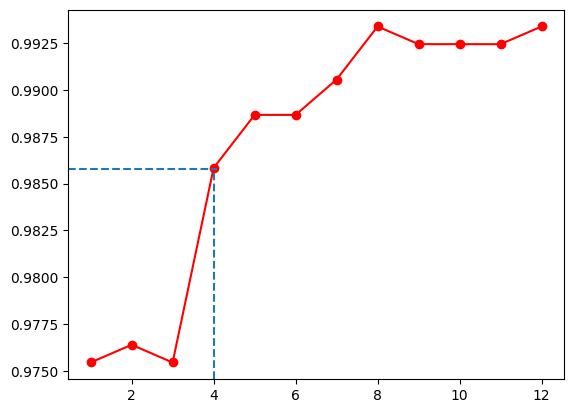

In [75]:
import matplotlib.pyplot as plt
plt.plot(range(1,13), results,marker='o',color='r')

plt.axhline(y=0.9858,xmin=0,xmax=.3,linestyle='--')
plt.axvline(x=4, ymin=0,ymax=0.57,linestyle='--')